In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29

#source: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1653861486365.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,05/27/2022,4158.24,--,4077.43,4158.49,4077.43
1,05/26/2022,4057.84,--,3984.60,4075.14,3984.60
2,05/25/2022,3978.73,--,3929.59,3999.33,3925.03
3,05/24/2022,3941.48,--,3942.94,3955.68,3875.13
4,05/23/2022,3973.75,--,3927.02,3981.88,3909.04
...,...,...,...,...,...,...
2546,06/04/2012,1278.18,--,1278.29,1282.55,1266.74
2547,06/01/2012,1278.04,--,1309.87,1309.87,1277.25
2548,05/31/2012,1310.33,--,1313.09,1319.74,1298.90
2549,05/30/2012,1313.32,--,1331.25,1331.25,1310.76


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2551.000000,2551.000000,2551.000000,2551.000000
mean,2583.117158,2559.599008,2572.692799,2545.322967
std,873.677321,916.693034,922.345386,910.206600
min,1278.040000,0.000000,0.000000,0.000000
25%,1967.735000,1961.115000,1969.255000,1947.805000
50%,2388.130000,2388.500000,2393.680000,2377.640000
75%,2976.675000,2976.180000,2988.370000,2961.770000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2551 non-null   object 
 1   Close/Last  2551 non-null   float64
 2   Volume      2551 non-null   object 
 3   Open        2551 non-null   float64
 4   High        2551 non-null   float64
 5   Low         2551 non-null   float64
dtypes: float64(4), object(2)
memory usage: 119.7+ KB


In [4]:
df.shape

(2551, 6)

In [5]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

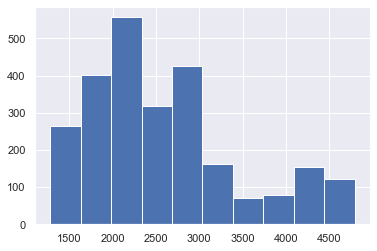

In [6]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [7]:
close_current = df['Close/Last'].iloc[0]
close_current

4158.24

In [8]:
close_mean = df['Close/Last'].mean()
close_mean

2583.1171579772736

In [9]:
close_sd = df['Close/Last'].std()
close_sd

873.6773205087403

In [10]:
sigma1 = close_mean + close_sd
sigma1

3456.7944784860138

In [11]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4330.471798994754

In [12]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5204.149119503494

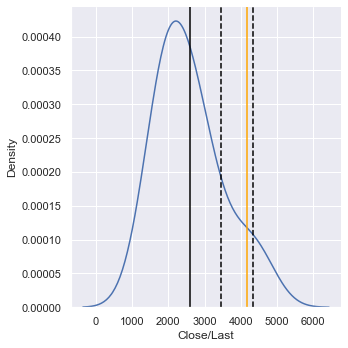

In [49]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df['Close/Last'], kind='kde', bw_adjust=3.0) 

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

plt.axvline(close_mean, color='black')
plt.axvline(sigma1, color='black', linestyle='--')
plt.axvline(sigma2, color='black', linestyle='--')
plt.axvline(close_current, color=c)

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2551 non-null   datetime64[ns]
 1   Close/Last  2551 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.0 KB


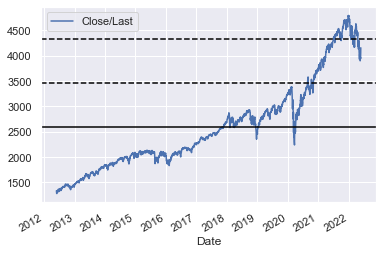

In [15]:
df1.plot(x='Date', y='Close/Last')
plt.axhline(close_mean, color='black')
plt.axhline(sigma1, color='black', linestyle='--')
plt.axhline(sigma2, color='black', linestyle='--')